In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns


## 1.Data Exploratory

In [3]:

data = pd.read_excel('../data/Gestational Diabetic Dat Set.xlsx')



In [4]:
data.describe()

,Case Number,Age,No of Pregnancy,Gestation in previous Pregnancy,BMI,HDL,Family History,unexplained prenetal loss,Large Child or Birth Default,PCOS,Sys BP,Dia BP,OGTT,Hemoglobin,Sedentary Lifestyle,Prediabetes,Class Label(GDM /Non GDM)
count,3525.000000,3525.000000,3525.000000,3525.000000,2444.000000,2524.000000,3525.000000,3525.000000,3525.00000,3525.000000,1820.000000,3525.000000,3012.000000,3525.000000,3525.000000,3525.000000,3525.000000
mean,1763.000000,32.581277,2.076312,0.960851,27.854092,46.471870,0.498156,0.364823,0.35773,0.264681,135.762088,81.538156,170.707503,13.959801,0.449645,0.293050,0.389220
std,1017.724177,6.169107,0.838637,0.722313,5.714737,10.800813,0.500068,0.481449,0.47940,0.441226,22.742844,11.379758,48.160549,1.863969,0.497529,0.455226,0.487643
min,1.000000,20.000000,1.000000,0.000000,13.300000,15.000000,0.000000,0.000000,0.00000,0.000000,90.000000,60.000000,80.000000,8.800000,0.000000,0.000000,0.000000
25%,882.000000,28.000000,1.000000,0.000000,24.400000,42.000000,0.000000,0.000000,0.00000,0.000000,122.000000,74.000000,142.000000,12.700000,0.000000,0.000000,0.000000
50%,1763.000000,32.000000,2.000000,1.000000,27.500000,49.000000,0.000000,0.000000,0.00000,0.000000,132.000000,81.000000,156.000000,14.000000,0.000000,0.000000,0.000000
75%,2644.000000,37.000000,3.000000,1.000000,31.000000,55.000000,1.000000,1.000000,1.00000,1.000000,153.000000,86.000000,195.000000,15.000000,1.000000,1.000000,1.000000
max,3525.000000,45.000000,4.000000,2.000000,45.000000,70.000000,1.000000,1.000000,1.00000,1.000000,185.000000,124.000000,403.000000,18.000000,1.000000,1.000000,1.000000


Drop the ID

In [5]:
data.columns

Index(['Case Number', 'Age', 'No of Pregnancy',
       'Gestation in previous Pregnancy', 'BMI', 'HDL', 'Family History',
       'unexplained prenetal loss', 'Large Child or Birth Default', 'PCOS',
       'Sys BP', 'Dia BP', 'OGTT', 'Hemoglobin', 'Sedentary Lifestyle',
       'Prediabetes', 'Class Label(GDM /Non GDM)'],
      dtype='object')

In [6]:
data=data.drop('Case Number',axis=1)

In [7]:
numeric_cols=['Age','No of Pregnancy','BMI','HDL','Sys BP','OGTT','Hemoglobin']

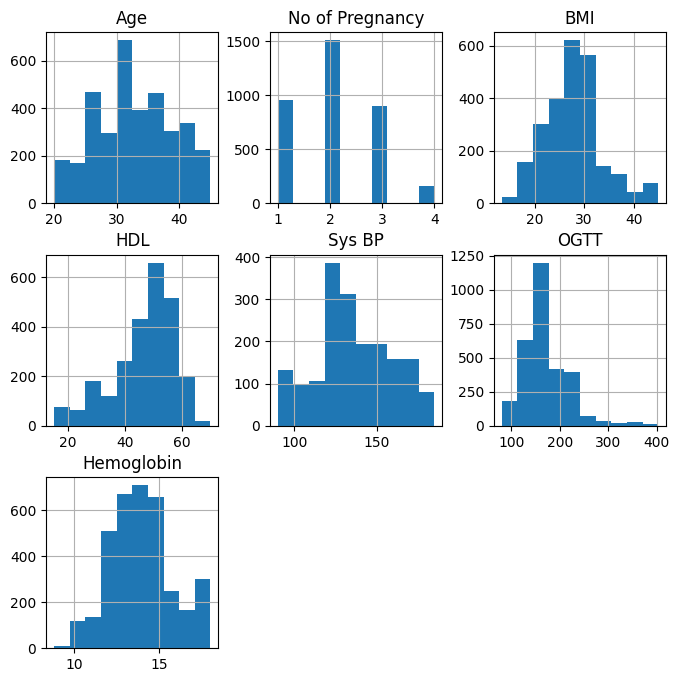

In [8]:
data[numeric_cols].hist(figsize=(8,8))
plt.savefig(f'../plots/distributions.png')
plt.show()


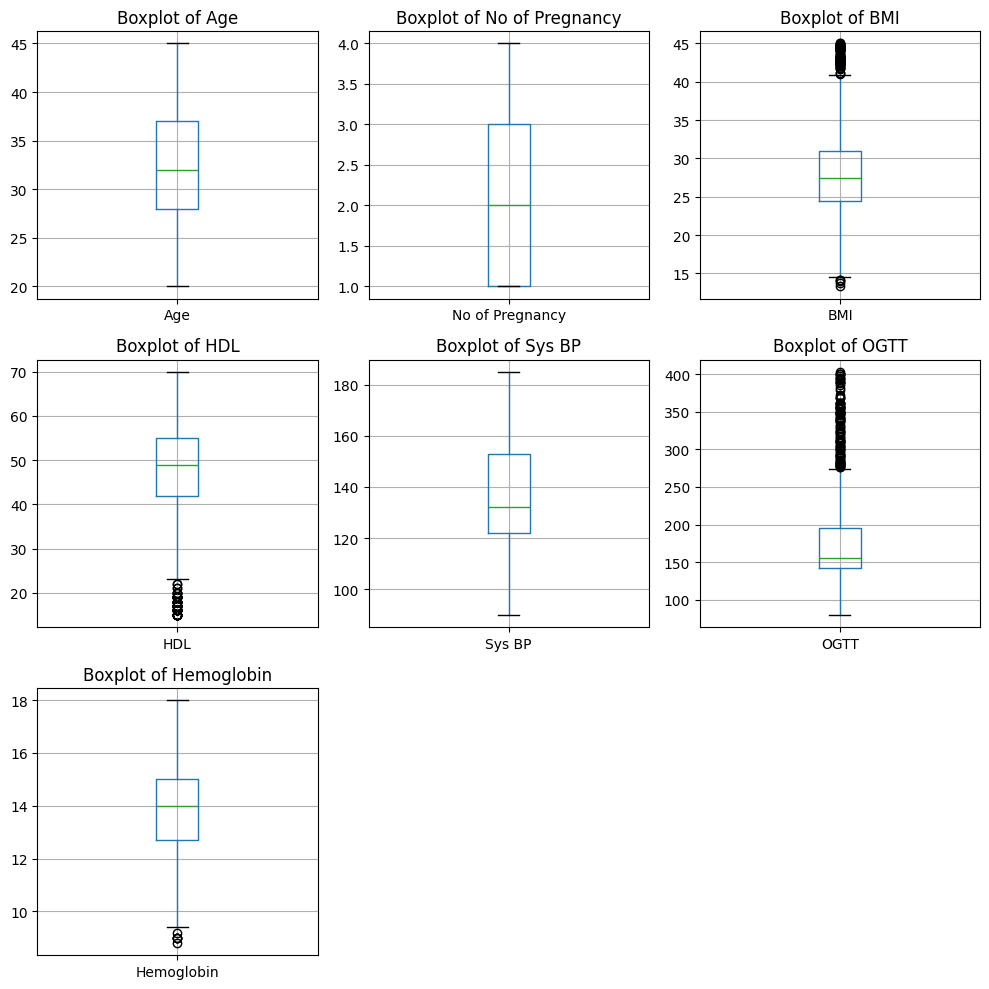

In [9]:
def plot_boxplots(df):
    # Get numerical columns
    numerical_columns = df.select_dtypes(include=['number']).columns

    # Calculate the number of subplots needed
    n = len(numerical_columns)
    n_cols = 3  # Number of columns in the subplot grid
    n_rows = n // n_cols + (n % n_cols > 0)  # Calculate the number of rows needed

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 10))
    axes = axes.flatten()  # Flatten the array to loop through it

    # Loop through each numerical column and plot a boxplot
    for i, column in enumerate(numerical_columns):
        df.boxplot(column=column, ax=axes[i])
        axes[i].set_title(f'Boxplot of {column}')

    # Remove any empty subplots
    for i in range(n, n_rows * n_cols):
        fig.delaxes(axes[i])

    plt.tight_layout()


plot_boxplots(data[numeric_cols])
plt.savefig(f'../plots/outliers.png')
plt.show()

There is no clear outliers

In [10]:
print(data.isna().sum())

Age                                   0
No of Pregnancy                       0
Gestation in previous Pregnancy       0
BMI                                1081
HDL                                1001
Family History                        0
unexplained prenetal loss             0
Large Child or Birth Default          0
PCOS                                  0
Sys BP                             1705
Dia BP                                0
OGTT                                513
Hemoglobin                            0
Sedentary Lifestyle                   0
Prediabetes                           0
Class Label(GDM /Non GDM)             0
dtype: int64


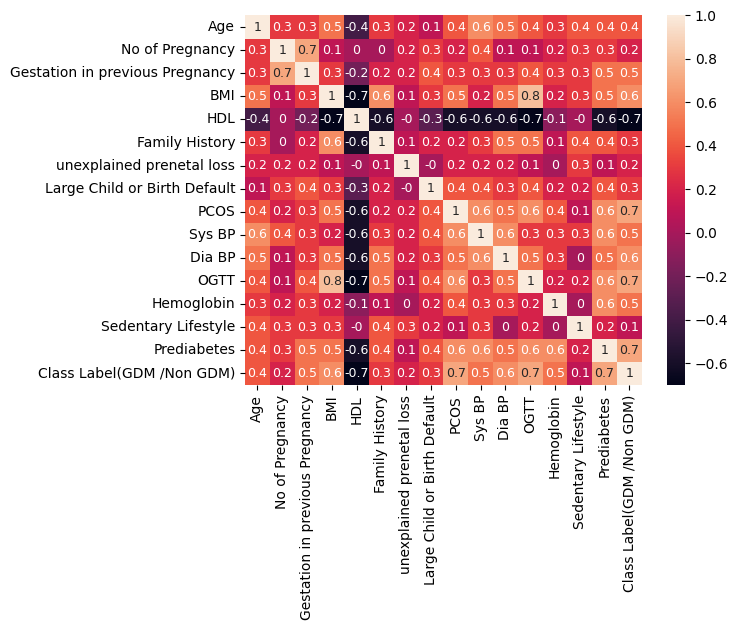

In [11]:
corr = data.corr()
sns.heatmap(round(corr,1), annot=True,annot_kws={"fontsize":9})
plt.savefig(f'../plots/correlation.png')
plt.show()

HDL seems significantly negative correlated to many other features

To be included in the final pipeline to avoid data leakage. Considering IterativeImputer or KNN imputer.

In [12]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.ensemble import RandomForestRegressor



# Initialize KNNImputer
imputer = IterativeImputer(estimator= 
    RandomForestRegressor(
        # We tuned the hyperparameters of the RandomForestRegressor to get a good
        # enough predictive performance for a restricted execution time.
        n_estimators=4,
        max_depth=10,
        bootstrap=True,
        max_samples=0.5,
        n_jobs=2,
        random_state=0,
    )
)
# Perform imputation on the DataFrame (excluding outliers)
data_imputed = data.copy()
data_imputed = imputer.fit_transform(data_imputed)  # Impute the NaNs

# Convert the result back to a DataFrame
data_imputed = pd.DataFrame(data_imputed, columns=data.columns)
print(data_imputed.isna().sum())

Age                                0
No of Pregnancy                    0
Gestation in previous Pregnancy    0
BMI                                0
HDL                                0
Family History                     0
unexplained prenetal loss          0
Large Child or Birth Default       0
PCOS                               0
Sys BP                             0
Dia BP                             0
OGTT                               0
Hemoglobin                         0
Sedentary Lifestyle                0
Prediabetes                        0
Class Label(GDM /Non GDM)          0
dtype: int64


c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Run a quick random forest to check feature importance

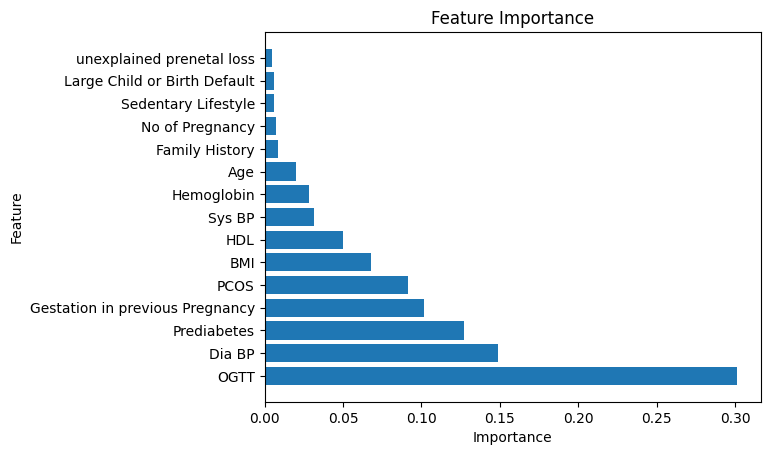

In [13]:
from sklearn.ensemble import RandomForestClassifier

X = data_imputed.drop('Class Label(GDM /Non GDM)', axis=1)
y = data_imputed['Class Label(GDM /Non GDM)']

# Initialize the forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Use RandomForestRegressor for regression problems

# Train the classifier
rf.fit(X, y)

feature_importances = rf.feature_importances_

feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Sort it for better visualization
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.savefig('../plots/feature_importance.png')
plt.show()

OGTT is the most important features, thus a good imputation is key

## 2. Model selection

In [14]:

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

names = [
    "Logistic Regression",
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Naive Bayes",
]

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    GaussianNB(),
]

In [15]:
from sklearn.model_selection import train_test_split
data['OGTT']=np.log(data['OGTT'])

X = data.drop('Class Label(GDM /Non GDM)', axis=1) 
y = data['Class Label(GDM /Non GDM)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV


# Setting up the cross-validation scheme
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Scorer for cross-validation
f1_scorer = make_scorer(f1_score, average='weighted')

# Define the pipeline
pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())  # Placeholder
])

# Set up the parameter grid. In this case, we need to enumerate classifiers and give them as a list to the grid.
param_grid = {
    'classifier': classifiers
}

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring=f1_scorer, return_train_score=True)

# Perform grid search
grid_search.fit(X_train, y_train)

train_scores = grid_search.cv_results_['mean_train_score']
test_scores = grid_search.cv_results_['mean_test_score']
for i, (train_score, test_score) in enumerate(zip(train_scores, test_scores)):
    print(f"{names[i]}: Train F1 Score: {train_score:.3f}, Test F1 Score: {test_score:.3f}")




c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.w

Logistic Regression: Train F1 Score: 0.971, Test F1 Score: 0.971
Nearest Neighbors: Train F1 Score: 0.981, Test F1 Score: 0.970
Linear SVM: Train F1 Score: 0.973, Test F1 Score: 0.971
RBF SVM: Train F1 Score: 1.000, Test F1 Score: 0.969
Decision Tree: Train F1 Score: 0.990, Test F1 Score: 0.972
Naive Bayes: Train F1 Score: 0.941, Test F1 Score: 0.942


c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


All classifiers seem promising. Nearest neighbours, RVF SVM, and decission tree have the best train F1 score, while maintaing a decent test F1 score. We can inplement a voting classifier with the three of them.

First, we tune the tree models to get the best fit.


### 2.1 Random forest

In [17]:

# Assuming you have a training dataset (X_train, y_train)
rf = RandomForestClassifier(random_state=42)

# Define a grid of parameters to search over
param_grid = {
    'rf__n_estimators': [100],
    'rf__max_depth': [10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': [ 'sqrt', 'log2'],
    'rf__class_weight': ['balanced', 'balanced_subsample']
}

# Define the pipeline
pipeline = Pipeline([
    ('imputer', imputer),
    # ('scaler', StandardScaler()), # no need to scale for a random forest
    ('rf', rf)  # Placeholder
])

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring=f1_scorer, return_train_score=True, verbose=2, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Extract the grid of scores after fitting
cv_results = grid_search.cv_results_
for i in range(len(cv_results['params'])):
    print(f"Params: {cv_results['params'][i]}")
    print(f"Train F1 Score: {cv_results['mean_train_score'][i]:.3f}")
    print(f"Test F1 Score: {cv_results['mean_test_score'][i]:.3f}\n")

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits


c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Params: {'rf__class_weight': 'balanced', 'rf__max_depth': 10, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Train F1 Score: 1.000
Test F1 Score: 0.971

Params: {'rf__class_weight': 'balanced', 'rf__max_depth': 10, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 100}
Train F1 Score: 1.000
Test F1 Score: 0.973

Params: {'rf__class_weight': 'balanced', 'rf__max_depth': 10, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 10, 'rf__n_estimators': 100}
Train F1 Score: 0.995
Test F1 Score: 0.975

Params: {'rf__class_weight': 'balanced', 'rf__max_depth': 10, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Train F1 Score: 0.997
Test F1 Score: 0.971

Params: {'rf__class_weight': 'balanced', 'rf__max_depth': 10, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5

Not many changes at tuning the hyperparameters, so we keep the most simple with a F1 score of 1 in the 5 cv in the training set.

In [18]:
# Extract best parameters and remove the 'rf__' prefix
best_params_rf = {k.replace('rf__', ''): v for k, v in best_params.items()}


rf_final=RandomForestClassifier(**best_params_rf, random_state=42, n_jobs=-1)

# Define the pipeline
pipeline = Pipeline([
    ('imputer', imputer),
    ('rf', rf_final)  # Placeholder
])

# Perform 5-fold cross-validation and calculate F1 score for each fold on the training set
train_f1_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1')

# Train the model on the entire training set
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_test = pipeline.predict(X_test)

# Calculate F1 score on the test set
test_f1_score = f1_score(y_test, y_pred_test)

print(f"Train F1 Score: {train_f1_scores.mean()}")
print(f"Test F1 Score: {test_f1_score}")


c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Train F1 Score: 0.9682863685584914
Test F1 Score: 0.9580152671755725


## 2.2 gradient boosting regression threes

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt_best = GradientBoostingClassifier(max_depth=10, 
                                      max_features='sqrt',
                                        min_samples_leaf=2,
                                        min_samples_split=2, 
                                        learning_rate=1,
                                        n_estimators=100,
                                        # n_iter_no_change=20,
                                        random_state=42
                                        )

# Define the pipeline
pipeline = Pipeline([
    ('imputer', imputer),
    ('gbrt', gbrt_best)  # Placeholder
])

# Perform 5-fold cross-validation and calculate F1 score for each fold on the training set
train_f1_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1')

# Train the model on the entire training set
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_test = pipeline.predict(X_test)

# Calculate F1 score on the test set
test_f1_score = f1_score(y_test, y_pred_test)


print(f'number of threes: {gbrt_best.n_estimators_}')

print(f"Train F1 Score: {train_f1_scores.mean()}")
print(f"Test F1 Score: {test_f1_score}")


c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


number of threes: 100
Train F1 Score: 0.9665289316684093
Test F1 Score: 0.963531669865643


## 2.3 SVM

In [20]:
param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.001, 0.01, 0.1, 1],
    'svm__kernel': ['rbf']
}

svm = SVC(random_state=42)

pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler',StandardScaler()),
    ('svm', svm)
])


# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring=f1_scorer, return_train_score=True, verbose=2, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Extract the grid of scores after fitting
cv_results = grid_search.cv_results_
for i in range(len(cv_results['params'])):
    print(f"Params: {cv_results['params'][i]}")
    print(f"Train F1 Score: {cv_results['mean_train_score'][i]:.3f}")
    print(f"Test F1 Score: {cv_results['mean_test_score'][i]:.3f}\n")

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits


Params: {'svm__C': 0.1, 'svm__gamma': 0.001, 'svm__kernel': 'rbf'}
Train F1 Score: 0.895
Test F1 Score: 0.895

Params: {'svm__C': 0.1, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}
Train F1 Score: 0.947
Test F1 Score: 0.943

Params: {'svm__C': 0.1, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
Train F1 Score: 0.973
Test F1 Score: 0.971

Params: {'svm__C': 0.1, 'svm__gamma': 1, 'svm__kernel': 'rbf'}
Train F1 Score: 1.000
Test F1 Score: 0.971

Params: {'svm__C': 1, 'svm__gamma': 0.001, 'svm__kernel': 'rbf'}
Train F1 Score: 0.947
Test F1 Score: 0.940

Params: {'svm__C': 1, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}
Train F1 Score: 0.974
Test F1 Score: 0.970

Params: {'svm__C': 1, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
Train F1 Score: 0.998
Test F1 Score: 0.971

Params: {'svm__C': 1, 'svm__gamma': 1, 'svm__kernel': 'rbf'}
Train F1 Score: 1.000
Test F1 Score: 0.969

Params: {'svm__C': 10, 'svm__gamma': 0.001, 'svm__kernel': 'rbf'}
Train F1 Score: 0.973
Test F1 Score: 0.971

Params: {'svm__C': 10, '

c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Does not seem sensible to gamma, but sensible to C

In [21]:
param_grid = {
    'svm__C': [1, 3, 5, 7, 10, 15],
    'svm__gamma': [ 0.1],
    'svm__kernel': ['rbf']
}

svm = SVC(random_state=42)

pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler',StandardScaler()),
    ('svm', svm)
])


# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring=f1_scorer, return_train_score=True, verbose=2, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Extract the grid of scores after fitting
cv_results = grid_search.cv_results_
for i in range(len(cv_results['params'])):
    print(f"Params: {cv_results['params'][i]}")
    print(f"Train F1 Score: {cv_results['mean_train_score'][i]:.3f}")
    print(f"Test F1 Score: {cv_results['mean_test_score'][i]:.3f}\n")

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Fitting 3 folds for each of 6 candidates, totalling 18 fits


Params: {'svm__C': 1, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
Train F1 Score: 0.998
Test F1 Score: 0.971

Params: {'svm__C': 3, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
Train F1 Score: 1.000
Test F1 Score: 0.971

Params: {'svm__C': 5, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
Train F1 Score: 1.000
Test F1 Score: 0.971

Params: {'svm__C': 7, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
Train F1 Score: 1.000
Test F1 Score: 0.971

Params: {'svm__C': 10, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
Train F1 Score: 1.000
Test F1 Score: 0.971

Params: {'svm__C': 15, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
Train F1 Score: 1.000
Test F1 Score: 0.971

Best parameters: {'svm__C': 3, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}


c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [22]:
# Extract best parameters and remove the 'svn__' prefix
best_params_svm = {k.replace('svm__', ''): v for k, v in best_params.items()}

svm_best=SVC(**best_params_svm,random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler',StandardScaler()),   
    ('svm', svm_best)  # Placeholder
])

# Perform 5-fold cross-validation and calculate F1 score for each fold on the training set
train_f1_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1')

# Train the model on the entire training set
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_test = pipeline.predict(X_test)

# Calculate F1 score on the test set
test_f1_score = f1_score(y_test, y_pred_test)


print(f"Train F1 Score: {train_f1_scores.mean()}")
print(f"Test F1 Score: {test_f1_score}")


c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Train F1 Score: 0.963977719543691
Test F1 Score: 0.9593810444874274


## 4.4 KNN

In [23]:
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()


# Define the pipeline
pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler',StandardScaler()),   
    ('knn', knn)  # Placeholder
])


# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid_knn, cv=cv, scoring=f1_scorer, return_train_score=True, verbose=2, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Extract the grid of scores after fitting
cv_results = grid_search.cv_results_
for i in range(len(cv_results['params'])):
    print(f"Params: {cv_results['params'][i]}")
    print(f"Train F1 Score: {cv_results['mean_train_score'][i]:.3f}")
    print(f"Test F1 Score: {cv_results['mean_test_score'][i]:.3f}\n")

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits


Params: {'knn__metric': 'euclidean', 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}
Train F1 Score: 0.981
Test F1 Score: 0.970

Params: {'knn__metric': 'euclidean', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}
Train F1 Score: 1.000
Test F1 Score: 0.970

Params: {'knn__metric': 'euclidean', 'knn__n_neighbors': 5, 'knn__weights': 'uniform'}
Train F1 Score: 0.976
Test F1 Score: 0.970

Params: {'knn__metric': 'euclidean', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}
Train F1 Score: 1.000
Test F1 Score: 0.970

Params: {'knn__metric': 'euclidean', 'knn__n_neighbors': 7, 'knn__weights': 'uniform'}
Train F1 Score: 0.974
Test F1 Score: 0.971

Params: {'knn__metric': 'euclidean', 'knn__n_neighbors': 7, 'knn__weights': 'distance'}
Train F1 Score: 1.000
Test F1 Score: 0.970

Params: {'knn__metric': 'euclidean', 'knn__n_neighbors': 9, 'knn__weights': 'uniform'}
Train F1 Score: 0.973
Test F1 Score: 0.971

Params: {'knn__metric': 'euclidean', 'knn__n_neighbors': 9, 'knn__weights': 'dis

c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [24]:
# Extract best parameters and remove the 'svn__' prefix
best_params_knn = {k.replace('knn__', ''): v for k, v in best_params.items()}

knn_best=KNeighborsClassifier(**best_params_knn)

# Define the pipeline
pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler',StandardScaler()),   
    ('knn', knn_best)  # Placeholder
])

# Perform 5-fold cross-validation and calculate F1 score for each fold on the training set
train_f1_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1')

# Train the model on the entire training set
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_test = pipeline.predict(X_test)

# Calculate F1 score on the test set
test_f1_score = f1_score(y_test, y_pred_test)


print(f"Train F1 Score: {train_f1_scores.mean()}")
print(f"Test F1 Score: {test_f1_score}")


c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Train F1 Score: 0.9659102426273741
Test F1 Score: 0.9655172413793104


# 5. Stacking the classifiers

We do not use the SVM as it is the worst performing of the classifiers tried

Try random forest

In [25]:
from sklearn.ensemble import StackingClassifier

estimators = [
    # ('rf', rf_final),
    ('gbrt', gbrt_best),
    ('svm', svm_best),
    ('knn', knn_best)
]


stacking_clf = StackingClassifier(estimators=estimators, 
                                  final_estimator=RandomForestClassifier(random_state=42), 
                                  cv=cv, 
                                  n_jobs=-1)


pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler',StandardScaler()),   
    ('stacking', stacking_clf) 
])

# Perform 5-fold cross-validation and calculate F1 score for each fold on the training set
train_f1_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1')

# Train the model on the entire training set
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_test = pipeline.predict(X_test)

# Calculate F1 score on the test set
test_f1_score = f1_score(y_test, y_pred_test)


print(f"Train F1 Score: {train_f1_scores.mean()}")
print(f"Test F1 Score: {test_f1_score}")

c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Train F1 Score: 0.9635759632247779
Test F1 Score: 0.9551656920077973


Try LogisticRegression

In [26]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('rf', rf_final),
    ('gbrt', gbrt_best),
    ('svm', svm_best),
    ('knn', knn_best)
]


stacking_clf = StackingClassifier(estimators=estimators, 
                                  final_estimator=LogisticRegression(),
                                  n_jobs=-1)


pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler',StandardScaler()),   
    ('stacking', stacking_clf) 
])

# Perform 5-fold cross-validation and calculate F1 score for each fold on the training set
train_f1_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1')

# Train the model on the entire training set
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_test = pipeline.predict(X_test)

# Calculate F1 score on the test set
test_f1_score = f1_score(y_test, y_pred_test)


print(f"Train F1 Score: {train_f1_scores.mean()}")
print(f"Test F1 Score: {test_f1_score}")

c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Train F1 Score: 0.964674269285132
Test F1 Score: 0.963106796116505


try SVC

In [27]:
from sklearn.ensemble import StackingClassifier

estimators = [
    # ('rf', rf_final),
    ('gbrt', gbrt_best),
    ('svm', svm_best),
    ('knn', knn_best)
]


stacking_clf = StackingClassifier(estimators=estimators, 
                                  final_estimator=SVC(probability=True, random_state=42),
                                  n_jobs=-1)


pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler',StandardScaler()),   
    ('stacking', stacking_clf) 
])

# Perform 5-fold cross-validation and calculate F1 score for each fold on the training set
train_f1_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1')

# Train the model on the entire training set
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_test = pipeline.predict(X_test)

# Calculate F1 score on the test set
test_f1_score = f1_score(y_test, y_pred_test)


print(f"Train F1 Score: {train_f1_scores.mean()}")
print(f"Test F1 Score: {test_f1_score}")

c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Train F1 Score: 0.9628998596291692
Test F1 Score: 0.9518072289156627
